In [1]:
# -----
# python 3 in 2020 Jan 5
# Kaggle Author

In [28]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm,skew
# limiting the float to 3 
pd.set_option("display.float_format",lambda x:'{:.3f}'.format(x))

In [3]:
train_df = pd.read_csv('./data/train.csv')
test_df  = pd.read_csv('./data/test.csv')
all_df   = pd.concat([train_df,test_df])
print("trian data size is:",train_df.shape)
print("test data size is:",test_df.shape)
print("all data size is:",all_df.shape) # 测试集合中没有被预测值y,所以少一列

trian data size is: (1460, 81)
test data size is: (1459, 80)
all data size is: (2919, 81)


In [4]:
# 所有的特征及预测房价
all_df.columns,print("特征个数是:{}个".format(len(all_df.columns) -1))

特征个数是:80个


(Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
        'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
        'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
        'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
        'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
        'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
        'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
        'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
        'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
        'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
        'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
        'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
        'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
        'PavedDrive', '

In [5]:
all_df.head(5)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,NaN,0,2,CollgCr,61,5,7,Y,0,NaN,CompShg,Gable,Normal,208500.0,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,TA,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,NaN,0,5,Veenker,0,8,6,Y,0,NaN,CompShg,Gable,Normal,181500.0,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,NaN,0,9,CollgCr,42,5,7,Y,0,NaN,CompShg,Gable,Normal,223500.0,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NaN,Gd,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,NaN,0,2,Crawfor,35,5,7,Y,0,NaN,CompShg,Gable,Abnorml,140000.0,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,NaN,0,12,NoRidge,84,5,8,Y,0,NaN,CompShg,Gable,Normal,250000.0,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [6]:
# Missing values of every features
#all_df.isnull().sum()

In [7]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [15]:
## 先判断特征的数据是数值型的还是类型性的； 数值型的就是指数；类别性的是离散
def DistinguishCate(dataframe):
    isdigit,notdigit = [],[]
    column = dataframe.columns
    for _ in column:
        items = dataframe[_].unique()
        for item in items:
            if str(item).isdigit():
                isdigit.append(_) # is digit
                break
            else:
                notdigit.append(_) # is not digit 
                break
    return isdigit,notdigit

In [16]:
digitfeatures,notdigitfeatures = DistinguishCate(train_df) # 先区分数字特征还是不是数字特征

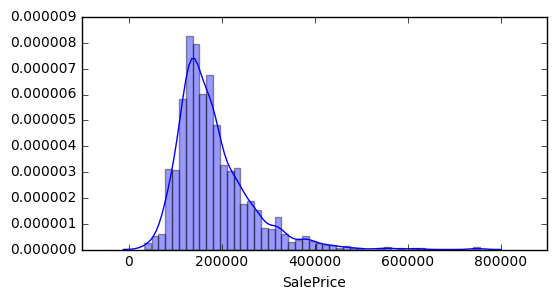

In [17]:
plt.figure(figsize=(6,3))
sns.distplot(train_df['SalePrice'])
plt.show()

In [18]:
## 定义一个函数来实现Boxplot图像
def Boxplot(feature):
    plt.figure(figsize = (4,4))
    data = pd.concat([train_df['SalePrice'],train_df[feature]],axis = 1)
    sns.boxplot(x = feature,y = 'SalePrice', data = data)
    plt.show()

# --------------------------
def snsscatteplot(feature):
    plt.figure(figsize = (4,4))
    data = pd.concat([train_df['SalePrice'],train_df[feature]],axis = 1)
    sns.scatterplot(x = feature,y = 'SalePrice', data = data)
    plt.show()

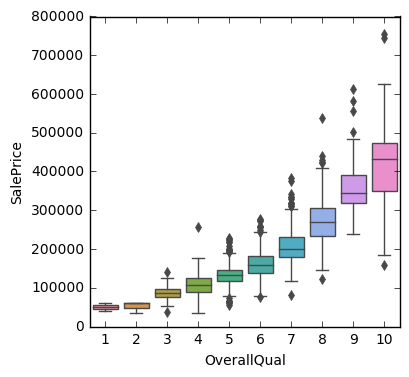

(None, 0)

In [19]:
## 特征1 - OverallQual: Rates the overall material and finish of the house 
## 房子的整体评价
Boxplot('OverallQual'),train_df['OverallQual'].isnull().sum()

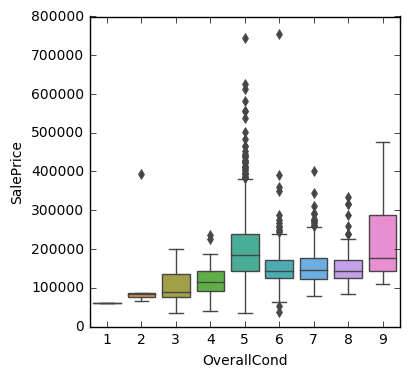

(None, 0)

In [20]:
# 特征2 - OverallCond: Rates the overall condition of the house 整体房价的打分，跟上面那个特征相似,但是特征
# 没有上面的更突出
Boxplot('OverallCond'),train_df['OverallCond'].isnull().sum()

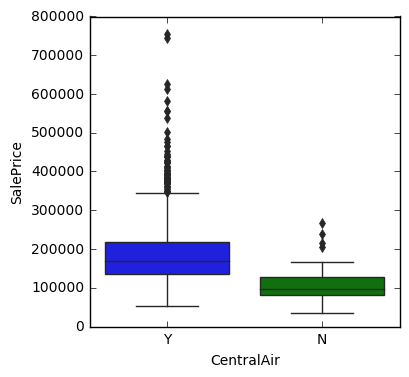

In [21]:
# CentralAir - Central air conditioning, have values: Y or N 
Boxplot('CentralAir')

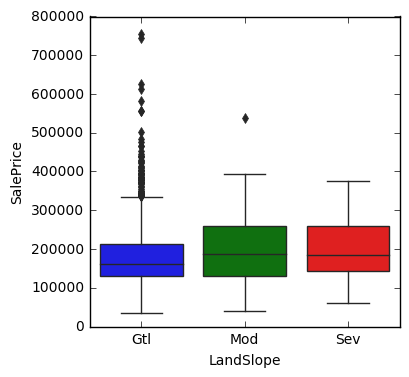

(None, 0)

In [22]:
# LandSlope - 物业坡度  - 没有缺失值
Boxplot('LandSlope'),train_df['LandSlope'].isnull().sum()
# Mod and Sev对应的房价较高；Gtl对应的房价较低

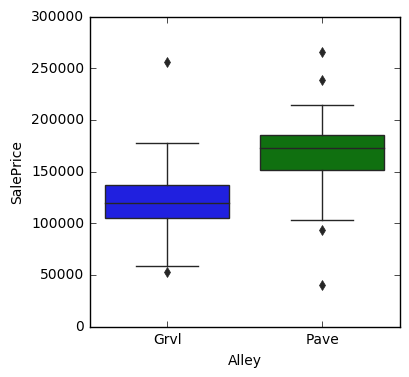

(None, 1369)

In [23]:
# Alley - Type of alley access to property 
Boxplot('Alley'),train_df['Alley'].isnull().sum()
# 这类特征缺少的样本数量更多，从现在的样本数量看‘Pave’的样本对应的房价更高

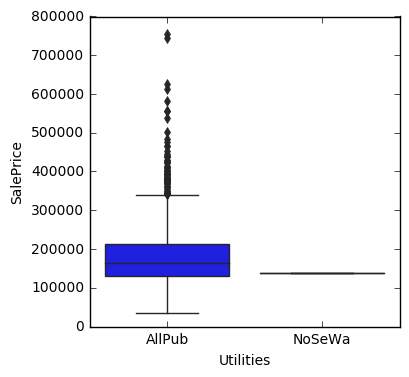

(None, 0)

In [24]:
### Utilities - Type of utilities available 可以使用的公共资源
Boxplot('Utilities'),train_df['Utilities'].isnull().sum()
# AllPub 对应的价钱更高

In [25]:
train_df['Utilities'].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

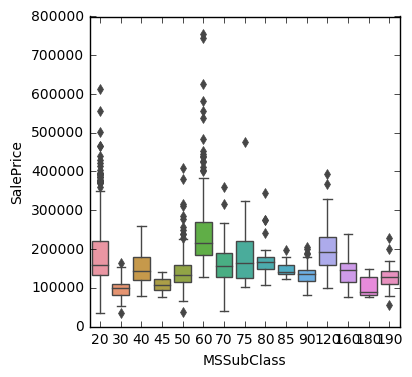

(None, 0)

In [26]:
# MSSubClass
Boxplot('MSSubClass'),train_df['MSSubClass'].isnull().sum()

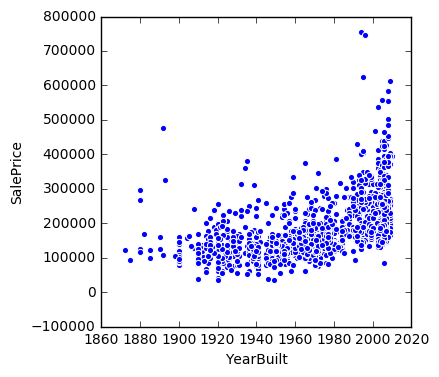

(None, 0)

In [27]:
# YearBuilt -  新建的年代 - 似乎是线性增长的样本
snsscatteplot('YearBuilt'),train_df['YearBuilt'].isnull().sum()